## Download employee retention dataset from here: 
https://www.kaggle.com/giripujar/hr-analytics

1. **Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (ie, whether they leave the company or continue to work).**
2. **Plot bar charts showing impact of employee salaries on retention.**
3. **Plot bar charts showing correlation between department and employee retention.**
4. **Now build logistic regression model using variables that were narrowed down in step 1.**
5. **Measure the accuracy (precision,recal,F1 and ROC) of the mode.**

## Importing the Libraries and the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("HR_comma_sep.csv")

## Data Descriptive Analysis

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### View Data Types

In [4]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Employees’ Satisfaction with the Company:** Range -> 0.09-1, Median -> 0.640, Mean -> 0.613.
Overall employees are more satisfied with the company.

**The Latest Evaluation:** Range -> 0.36-1, Median -> 0.720, Mean -> 0.716.
Average Employee Evaluation is above average.

**Number of Projects:** Range -> 2-7, Median -> 4, Mean -> 3.8.
Average Number of Participating Projects is 4.

**Average Monthly Working Hours:** Range -> 96-310 hours, Median -> 200, Mean -> 201

**Working Years:** Range -> 2-10 years, Median -> 3, Mean -> 3.5

In [6]:
data['left'].value_counts()/data['left'].count() * 100

0    76.191746
1    23.808254
Name: left, dtype: float64

This shows us that out of all employees, **23.808254 %** have left the company, while **76.191746 %** are still working in the company.

In [7]:
data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

Clearly, there are no missing values in the dataset.

## (1) Visual Analysis

## Impact of Company Satisfaction on Employee Retention

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

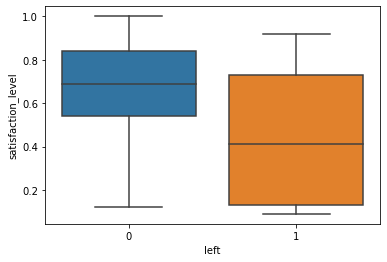

In [8]:
%matplotlib inline
sns.boxplot(x=data['left'], y=data['satisfaction_level'])

We can clearly see that the satisfaction level is generally **above 0.5 for the employees still working in the company**, whereas the satidfaction level varies from **less than 0.2 to almost 0.7 for the employees who left the company**.

## Impact of Performance Evaluation on Employee Retention

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

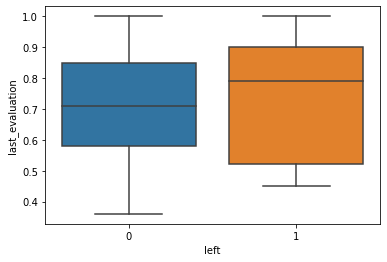

In [9]:
sns.boxplot(x=data['left'], y=data['last_evaluation'])

## Impact of Average Monthly Hours on Employee Retention

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

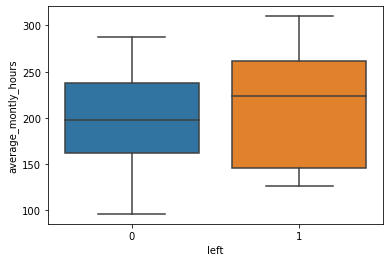

In [10]:
sns.boxplot(x=data['left'], y=data['average_montly_hours'])

## (2) Impact of Salary Level on Employee Retention

Text(0.5, 0, 'Salary Level')

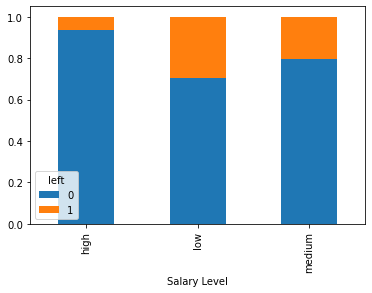

In [11]:
table = pd.crosstab(data['salary'], data['left'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Salary Level')

Clearly, more employees with **low (almost 30%) and medium (almost 20%) salaries left the company**, whereas employees with **high salaries (less than 5%) have a very low amount of people who left the company**.

## Impact of Department on Employee Retention

Text(0.5, 0, 'Department')

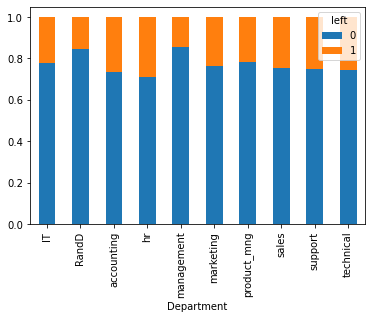

In [12]:
table=pd.crosstab(data['Department'], data['left'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Department')

## Impact of Number of Projects on Employee Retention

<AxesSubplot:xlabel='number_project'>

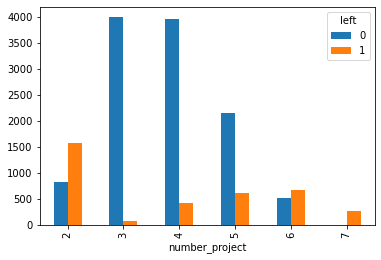

In [13]:
pd.crosstab(data['number_project'], data['left']).plot(kind='bar')

Greater amount of people working on **2 or more than 6 projects** left the company, compared to the employees working on 3, 4 and 5 projects, which preferred to stay in the company. 

## Impact of Working Years on Employee Retention

<AxesSubplot:xlabel='time_spend_company'>

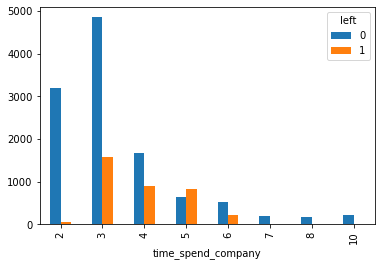

In [14]:
pd.crosstab(data['time_spend_company'], data['left']).plot(kind='bar')

It can be observed that **more employees who worked in the company for 5 years left the company**, compared to the the employees who didn't. It can also be observed that **employees with 3 years of experience are more likely to leave the company**, while **employees with over 6 years if experience in the company aren't found to leave the company at all**.

## Impact of work Accidents on Employee Retention

<AxesSubplot:xlabel='Work_accident'>

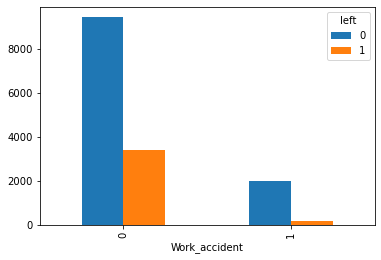

In [15]:
pd.crosstab(data['Work_accident'], data['left']).plot(kind='bar')

## Impact of Promotion in Last 5 Years on Employee Retention

<AxesSubplot:xlabel='promotion_last_5years'>

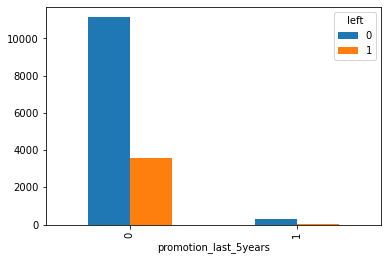

In [16]:
pd.crosstab(data['promotion_last_5years'], data['left']).plot(kind='bar')

## Data Preprocessing

### Converting ```'salary'``` from Character Type to Numerical Type

In [17]:
data['salary'] = data['salary'].map({"low": 0, "medium": 1, "high": 2})
data['salary'].unique()

array([0, 1, 2], dtype=int64)

### Applying One-Hot Encoding to the Dataset

In [18]:
data = pd.get_dummies(data, prefix="sales")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### (2) Correlation Bar Plot between Department and Employee Retention

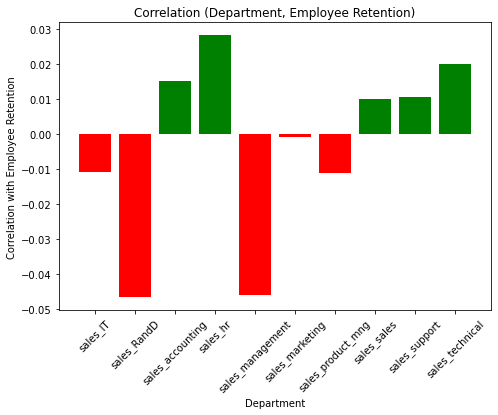

In [19]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
names = ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']

for dept in names:
    dept = "sales_" + dept
    correlation = data[dept].corr(data['left'])
    if correlation > 0:
        ax.bar(dept, correlation, color='green')
    else:
        ax.bar(dept, correlation, color='red')

plt.title("Correlation (Department, Employee Retention)")
plt.ylabel("Correlation with Employee Retention")
plt.xlabel("Department")
plt.xticks(rotation=45)

plt.show()

Clearly, there exists a **negative correlation** between the *IT, RandD, Management, Marketing and Product Management departments* and *Employee Retention*.

### Splitting the dataset

In [20]:
from sklearn.model_selection import train_test_split
x = data.drop(['left'], axis=1)
y = data['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Standardizing the Dataset using StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## (4) Building the Logistic Regression Model

### Fitting the Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression()

### Generating the Accuracy Report for Logistic Regression

In [23]:
print('Logistic regression accuracy: {}\n'.format(accuracy_score(y_test, regressor.predict(x_test))))
print(classification_report(y_test, regressor.predict(x_test)))

Logistic regression accuracy: 0.7903333333333333

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2288
           1       0.60      0.35      0.44       712

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



### Generating the Confusion Matrix Heatmap for the Logistic Regression Model

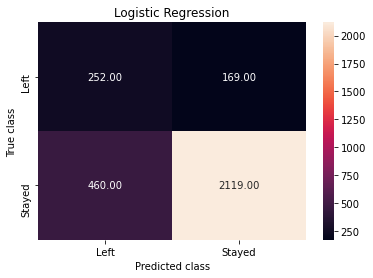

In [24]:
y_pred = regressor.predict(x_test)
logreg_cm = confusion_matrix(y_pred, y_test, labels=[1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

## (5) Calculating Receiving Operating Characteristic (ROC) for the Model

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, regressor.predict(x_test))
print("Receiving Operating Characteristic (ROC):",logit_roc_auc)

Receiving Operating Characteristic (ROC): 0.6400344739530132


### Plotting the ROC Curve for the Model

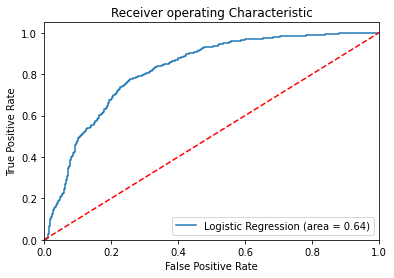

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, regressor.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()